# Experiments on SIR

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def target_function(x):
    return (np.sin(x)+1.5)/(3*np.pi)

def proposal_pdf(x):
    return 1/(2*np.pi)


def SIR(target_function, proposal_pdf,M, N):
    num_proposal = M
    num_chosen = N
    # Choose samples based on weights
    sample_chosen = []
    # Generate random samples from uniform distribution
    proposal_samples = np.random.uniform(0, 2*np.pi, num_proposal)

    # Calculate weights
    weights = [target_function(sample) / proposal_pdf(sample) for sample in proposal_samples]
    w_sum = np.sum(np.array(weights))
    weights /= np.sum(weights)
    for i in range(num_chosen):     
        # Choose one sample at a time based on weights
        chosen_sample = np.random.choice(proposal_samples, p=weights)
        sample_chosen.append(chosen_sample)

    return sample_chosen,w_sum


    # Plotting
    plt.figure(figsize=[6, 4])
    # Calculate PDF curve
    counts, bins = np.histogram(sample_chosen, bins=100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, counts, color='red', label='SIR PDF')  # Plot PDF curve
    x = np.linspace(0, 2*np.pi, 100)  
    target_distribution = [target_fuction(i) for i in x]
    plt.plot(x, target_distribution, label="$target distribution$")
    plt.xlabel("Sample", size=18)
    plt.ylabel("pdf", size=18)
    plt.legend(prop={"size": 14}) 
    plt.show()

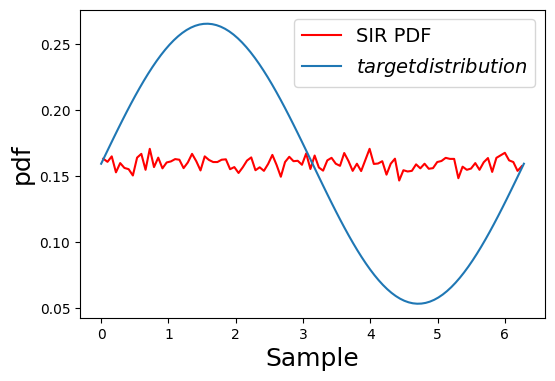

In [52]:
num_iterations = 100000
samples_chosen = []
for i in range(num_iterations):
    samples_chosen += SIR(target_function, proposal_pdf,M = 1, N = 1)[0]
# Plotting
plt.figure(figsize=[6, 4])
# Calculate PDF curve
counts, bins = np.histogram(samples_chosen, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, counts, color='red', label='SIR PDF')  # Plot PDF curve
x = np.linspace(0, 2*np.pi, 100)  
target_distribution = [target_function(i) for i in x]
plt.plot(x, target_distribution, label="$target distribution$")
plt.xlabel("Sample", size=18)
plt.ylabel("pdf", size=18)
plt.legend(prop={"size": 14}) 
plt.show()



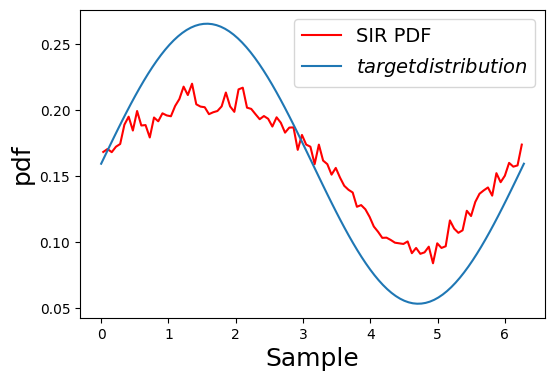

In [53]:
num_iterations = 100000
samples_chosen = []
for i in range(num_iterations):
    samples_chosen += SIR(target_function, proposal_pdf,M = 2, N = 1)[0]
# Plotting
plt.figure(figsize=[6, 4])
# Calculate PDF curve
counts, bins = np.histogram(samples_chosen, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, counts, color='red', label='SIR PDF')  # Plot PDF curve
x = np.linspace(0, 2*np.pi, 100)  
target_distribution = [target_function(i) for i in x]
plt.plot(x, target_distribution, label="$target distribution$")
plt.xlabel("Sample", size=18)
plt.ylabel("pdf", size=18)
plt.legend(prop={"size": 14}) 
plt.show()

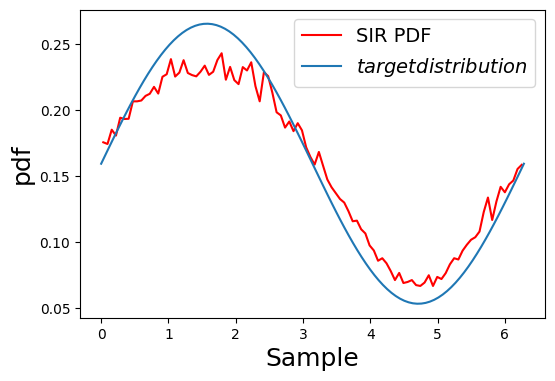

In [54]:
num_iterations = 100000
samples_chosen = []
for i in range(num_iterations):
    samples_chosen += SIR(target_function, proposal_pdf,M = 4, N = 1)[0]
# Plotting
plt.figure(figsize=[6, 4])
# Calculate PDF curve
counts, bins = np.histogram(samples_chosen, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, counts, color='red', label='SIR PDF')  # Plot PDF curve
x = np.linspace(0, 2*np.pi, 100)  
target_distribution = [target_function(i) for i in x]
plt.plot(x, target_distribution, label="$target distribution$")
plt.xlabel("Sample", size=18)
plt.ylabel("pdf", size=18)
plt.legend(prop={"size": 14}) 
plt.show()

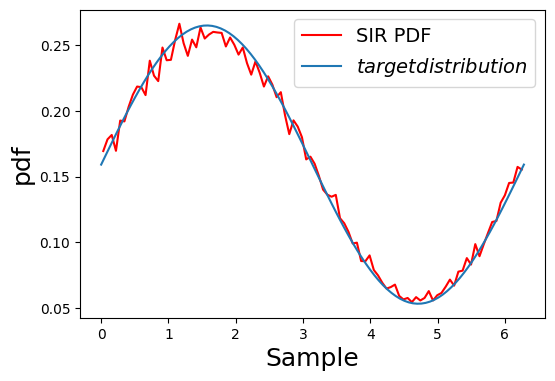

In [55]:
num_iterations = 100000
samples_chosen = []
for i in range(num_iterations):
    samples_chosen += SIR(target_function, proposal_pdf,M = 16, N = 1)[0]
# Plotting
plt.figure(figsize=[6, 4])
# Calculate PDF curve
counts, bins = np.histogram(samples_chosen, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, counts, color='red', label='SIR PDF')  # Plot PDF curve
x = np.linspace(0, 2*np.pi, 100)  
target_distribution = [target_function(i) for i in x]
plt.plot(x, target_distribution, label="$target distribution$")
plt.xlabel("Sample", size=18)
plt.ylabel("pdf", size=18)
plt.legend(prop={"size": 14}) 
plt.show()

# Experiments on RIS

In [34]:
def RIS(SIR,evaluate_function, target_function, proposal_pdf, M, N):
    samples, w_sum = SIR(target_function, proposal_pdf, M, N)
    I_ris = 0
    for i in range(N):
        I_ris += evaluate_function(samples[i])/target_function(samples[i])*w_sum
    return I_ris/(M*N)

def evaluate_function(x):
    return (np.cos(x)+1.5)/(3*np.pi)

In [35]:
num_iterations = [1000,1500, 2000, 3000, 4000,5000,6000, 7000,8000,9000,10000, 20000, 30000,40000,50000,60000,70000,80000,90000,100000]

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:06<00:00,  3.33s/it]


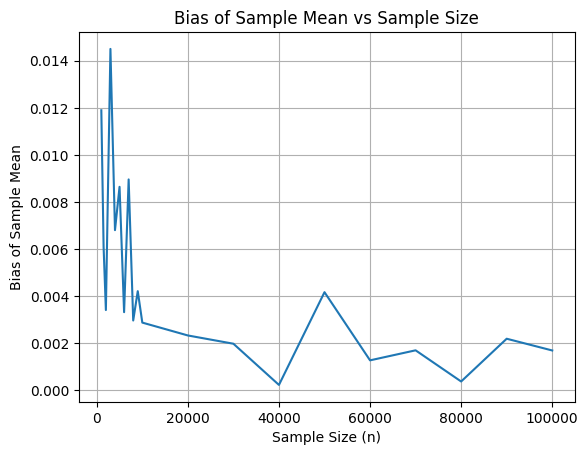

In [36]:
gap = 2000
start = 1000
biases = []

# Initialize the tqdm progress bar
with tqdm(total=len(num_iterations)) as pbar:
    for i in num_iterations:
        I_ris = np.zeros((i, 1))
        for j in range(i):
            I_ris[j] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=1, N=1)
        bias = np.abs(np.mean(I_ris)-1)
        biases.append(bias)
        # Update the progress bar
        pbar.update(1)

plt.plot(num_iterations, biases)
plt.xlabel('Sample Size (n)')
plt.ylabel('Bias of Sample Mean')
plt.title('Bias of Sample Mean vs Sample Size')
plt.grid(True)
plt.show()


In [37]:
num_iterations = 10000
I_ris_1, I_ris_2, I_ris_4, I_ris_16 = [np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1))]
for i in range(num_iterations):
    I_ris_1[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=1, N=1)
    I_ris_2[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=2, N=1)
    I_ris_4[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=4, N=1)
    I_ris_16[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=16, N=1)

print(np.var(I_ris_1))
print(np.var(I_ris_2))
print(np.var(I_ris_4))
print(np.var(I_ris_16))

0.2239100588488303
0.41750826907393257
0.5085268058914199
0.5677448545066847


In [38]:
num_iterations = 10000
I_ris_1, I_ris_2, I_ris_4, I_ris_16 = [np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1))]
for i in range(num_iterations):
    I_ris_1[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=1, N=1)
    I_ris_2[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=2, N=1)
    I_ris_4[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=4, N=1)
    I_ris_16[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=16, N=1)

print(np.var(I_ris_1))
print(np.var(I_ris_2))
print(np.var(I_ris_4))
print(np.var(I_ris_16))

0.221591802407136
0.10913556174564447
0.05555279169607827
0.013586564213136134


In [39]:
num_iterations = 10000
I_ris_1, I_ris_2, I_ris_4, I_ris_16 = [np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1))]
for i in range(num_iterations):
    I_ris_1[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=16, N=1)
    I_ris_2[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=16, N=2)
    I_ris_4[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=16, N=4)
    I_ris_16[i] = RIS(SIR, evaluate_function,target_function, proposal_pdf, M=16, N=16)

print(np.var(I_ris_1))
print(np.var(I_ris_2))
print(np.var(I_ris_4))
print(np.var(I_ris_16))

0.5615246833715283
0.29844131733327633
0.15393407527288874
0.048837073927600144


In [40]:
num_iterations = 10000
I_ris_1, I_ris_2, I_ris_4, I_ris_16 = [np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1)),np.zeros((num_iterations, 1))]
for i in range(num_iterations):
    I_ris_1[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=16, N=1)
    I_ris_2[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=16, N=2)
    I_ris_4[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=16, N=4)
    I_ris_16[i] = RIS(SIR, target_function,target_function, proposal_pdf, M=16, N=16)

print(np.var(I_ris_1))
print(np.var(I_ris_2))
print(np.var(I_ris_4))
print(np.var(I_ris_16))

0.013895296123283449
0.01398032932836574
0.014150949951991915
0.014038208652484145


# Experiments on MIS with RIS